In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\InjuryData\injury_data.csv")

In [3]:
# Basic data check
print(df.info())
print(df.isnull().sum())

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Fill or drop missing values
df_encoded.fillna(df_encoded.mean(), inplace=True)  # or use imputation strategies


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB
None
Player_Age              0
Player_Weight           0
Player_Height           0
Previous_Injuries       0
Training_Intensity      0
Recovery_Time           0
Likelihood_of_Injury    0
dtype: int64


In [6]:
# Replace 'Injury' with the actual column name indicating injury (e.g., 'is_injured', 'injury_flag', etc.)
X = df_encoded.drop("Likelihood_of_Injury", axis=1)
y = df_encoded["Likelihood_of_Injury"]

In [7]:
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
[[59 36]
 [57 48]]
              precision    recall  f1-score   support

           0       0.51      0.62      0.56        95
           1       0.57      0.46      0.51       105

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200


Model: Random Forest
[[56 39]
 [44 61]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        95
           1       0.61      0.58      0.60       105

    accuracy                           0.58       200
   macro avg       0.58      0.59      0.58       200
weighted avg       0.59      0.58      0.59       200


Model: SVM
[[ 95   0]
 [105   0]]
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        95
           1       0.00      0.00      0.00       105

    accuracy                           0.48       200
   ma

C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
!pip install xgboost


     -------------------------------------- 124.9/124.9 MB 6.8 MB/s eta 0:00:00


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier


In [14]:
# Load dataset
df = pd.read_csv(r"D:\InjuryData\injury_data.csv")

# Define features and target
X = df.drop("Likelihood_of_Injury", axis=1)
y = df["Likelihood_of_Injury"]

# Optional: Scale features (not strictly required for tree models like XGBoost, but helps if features are on different scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Initialize and train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[51 44]
 [50 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        95
           1       0.56      0.52      0.54       105

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200


Accuracy Score: 0.53


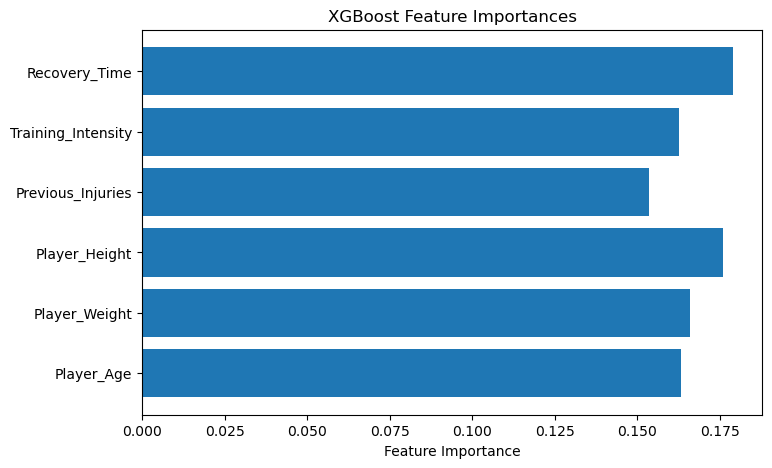

In [17]:
import matplotlib.pyplot as plt

# Plot feature importances
xgb_feature_names = X.columns
importances = model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(xgb_feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances")
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\JIMM

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}


C:\Users\JIMMY ULAHANNAN\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
import joblib

joblib.dump(model, "xgb_injury_model.pkl")   # Save the XGBoost model
joblib.dump(scaler, "scaler.pkl")            # Save the scaler (StandardScaler)

['scaler.pkl']